<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

In [1]:
# time ofr a classifaction task.
# we will also focus on how to identify and deal with
# overfitting through early stopping callbacks
# and dropout layers

#early stopping is when keras automatically
#stops training based on a loss condition on the validation
# data passed during the model.fit() call.

'''
dropout layers are layers that can be added to "turn off" neyros
to prevent over fitting... As in it will drop a percentage of
neuron units int he previous layer evrey batch.
'''

# Keras TF 2.0 - Code Along Classification Project

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

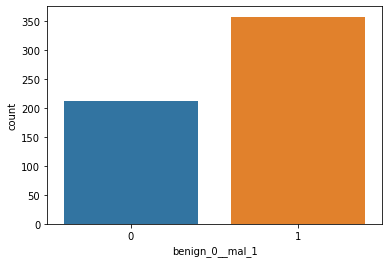

In [10]:
sns.countplot(x='benign_0__mal_1',data=df)

# seeing if its a well balanced problem..

# as we can see its realtiveyl well balanced.

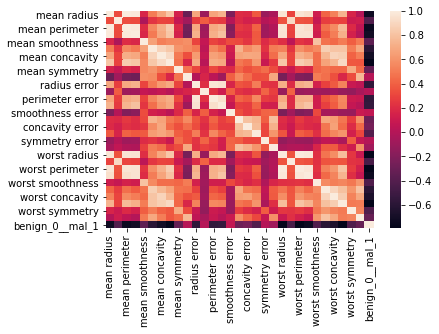

In [11]:
sns.heatmap(df.corr())

In [66]:
df.corr()['benign_0__mal_1'].sort_values()

'''
we can see that most features are highly negatively
correlated.
'''

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

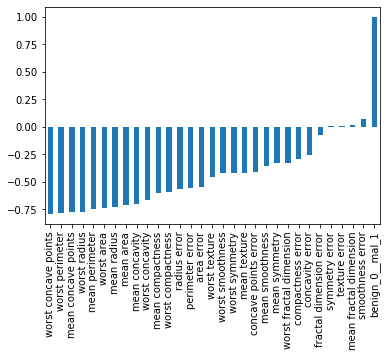

In [68]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

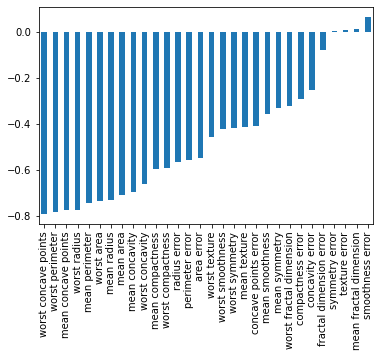

In [12]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')
#dropping itself because it is perfectly related to itself

## Train Test Split

In [13]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

# make sure to use .values to get numpy array

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(X_train)

#once again, only fit scaler on x train

MinMaxScaler()

In [19]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [23]:
X_train.shape

(426, 30)

In [24]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))

#last activatioon must be sigmoid because we want it to be 
# between 0 or 1
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [25]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

#using a big epoch value so wecan see what it looks like to overfit
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 0s 14ms/step - loss: 0.6737 - val_loss: 0.6600
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6406 - val_loss: 0.6267
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6033 - val_loss: 0.5864
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5621 - val_loss: 0.5390
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5095 - val_loss: 0.4822
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4582 - val_loss: 0.4290
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4095 - val_loss: 0.3807
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3656 - val_loss: 0.3348
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3240 - val_loss: 0.2912
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2850 - val_loss: 0.2522
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0524 - val_loss: 0.1108
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0524 - val_loss: 0.1144
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0532 - val_loss: 0.1123
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0514 - val_loss: 0.1102
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0531 - val_loss: 0.1139
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0518 - val_loss: 0.1108
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0515 - val_loss: 0.1131
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0510 - val_loss: 0.1096
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0530 - val_loss: 0.1130
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0506 - val_loss: 0.1081
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0421 - val_loss: 0.1381
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0416 - val_loss: 0.1383
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0464 - val_loss: 0.1394
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0446 - val_loss: 0.1322
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0446 - val_loss: 0.1406
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0505 - val_loss: 0.1484
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0427 - val_loss: 0.1334
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0411 - val_loss: 0.1472
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0449 - val_loss: 0.1355
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.1341
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0405 - val_loss: 0.1628
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0361 - val_loss: 0.1580
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0379 - val_loss: 0.1500
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0372 - val_loss: 0.1518
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0373 - val_loss: 0.1570
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0365 - val_loss: 0.1576
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.1544
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.1561
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0361 - val_loss: 0.1490
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0370 - val_loss: 0.1670
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0316 - val_loss: 0.1603
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0342 - val_loss: 0.1565
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0306 - val_loss: 0.1790
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0332 - val_loss: 0.1596
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0335 - val_loss: 0.1682
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0307 - val_loss: 0.1611
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0320 - val_loss: 0.1762
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0323 - val_loss: 0.1644
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0314 - val_loss: 0.1722
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0338 - val_loss: 0.1648
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0358 - val_loss: 0.1696
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0334 - val_loss: 0.1781
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0297 - val_loss: 0.1767
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0305 - val_loss: 0.1730
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0284 - val_loss: 0.1825
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0270 - val_loss: 0.1767
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0300 - val_loss: 0.1695
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0281 - val_loss: 0.1783
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0269 - val_loss: 0.1828
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0292 - val_loss: 0.1895
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0262 - val_loss: 0.1954
Epoch 489/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0275 - val_loss: 0.1924
Epoch 490/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0351 - val_loss: 0.1788
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.2333
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0259 - val_loss: 0.1729
Epoch 493/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0255 - val_loss: 0.1845
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0237 - val_loss: 0.1910
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0238 - val_loss: 0.1932
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0229 - val_loss: 0.1914
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0226 - val_loss: 0.1961
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0208 - val_loss: 0.1921
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0228 - val_loss: 0.2194
Epoch 571/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0228 - val_loss: 0.2148
Epoch 572/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0208 - val_loss: 0.2158
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0203 - val_loss: 0.2246
Epoch 574/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0199 - val_loss: 0.2181
Epoch 575/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0194 - val_loss: 0.2243
Epoch 576/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0198 - val_loss: 0.2081
Epoch 577/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0198 - val_loss: 0.2188
Epoch 578/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0196 - val_loss: 0.2238
Epoc

In [27]:
# model.history.history

In [28]:
model_loss = pd.DataFrame(model.history.history)

In [29]:
# model_loss

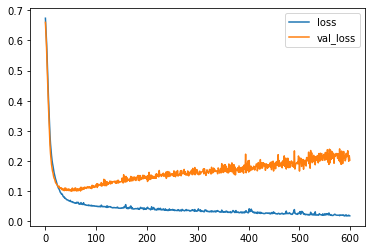

In [30]:
model_loss.plot()

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [31]:
#redefining our model

model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [33]:
early_stop = EarlyStopping(monitor='val_loss', 
                           
            mode='min', verbose=1, patience=25)

#we are monitering validation loss, we wanna stop
# when val los is at a minimum

In [34]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6682 - val_loss: 0.6451
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6246 - val_loss: 0.5983
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5729 - val_loss: 0.5447
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5182 - val_loss: 0.4904
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4661 - val_loss: 0.4373
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4145 - val_loss: 0.3887
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3659 - val_loss: 0.3407
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3214 - val_loss: 0.2985
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2849 - val_loss: 0.2631
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2528 - val_loss: 0.2337
Epoch 11

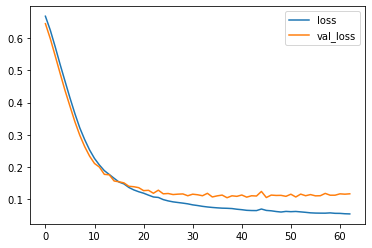

In [35]:
'''
it stopped after 63 epochs

'''

model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [36]:
from tensorflow.keras.layers import Dropout

In [37]:
'''
dropout layers will "turn off" a percentage of

neurons randomly. They're another way to adress overfitting

'''

model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

#dropout layer takes in the rate, 
# or percentage of neurons that will be "turned off" randomly

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [38]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.7026 - val_loss: 0.6685
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6680 - val_loss: 0.6445
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6578 - val_loss: 0.6211
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6335 - val_loss: 0.5903
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5926 - val_loss: 0.5575
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5672 - val_loss: 0.5193
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5561 - val_loss: 0.4861
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5373 - val_loss: 0.4578
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5038 - val_loss: 0.4267
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4739 - val_loss: 0.3942
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.1086 - val_loss: 0.1056
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1071 - val_loss: 0.1109
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0970 - val_loss: 0.1095
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0982 - val_loss: 0.1055
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1056 - val_loss: 0.1168
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0940 - val_loss: 0.1129
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0883 - val_loss: 0.1033
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1089 - val_loss: 0.1104
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0925 - val_loss: 0.1110
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0887 - val_loss: 0.1082
Epoch 93/600


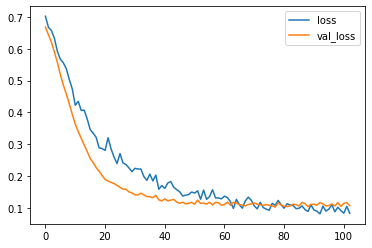

In [39]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# we can see with both dropout layers and 
# early stopping, we avoid overfitting

#so we can see the validation loss greatly increases
# from over fitting.

# Model Evaluation

In [40]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [43]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]


In [ ]:
# overall much imporved behavior.